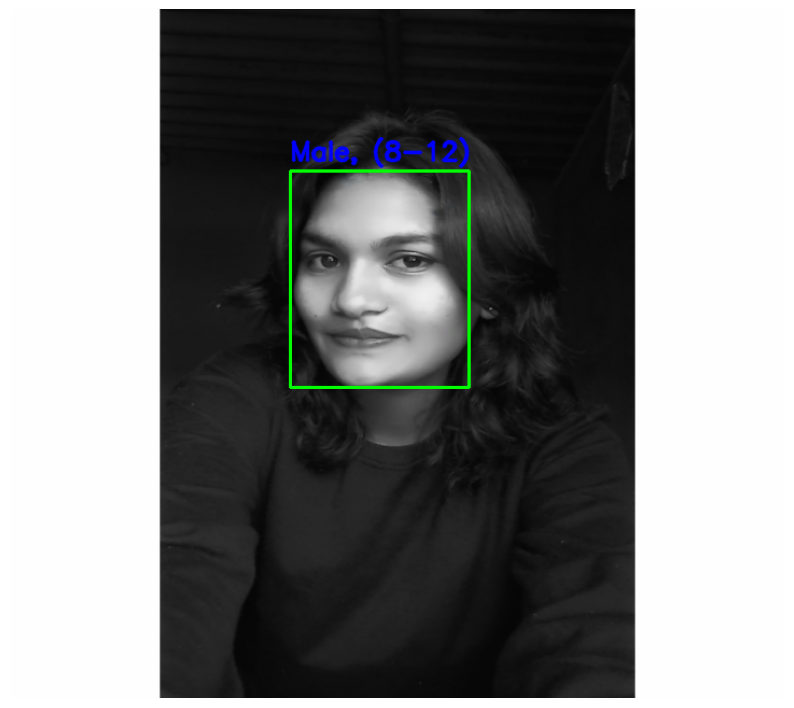

In [1]:
import cv2 
import matplotlib.pyplot as plt

# Load and preprocess input image 
image_path = r"C:\Users\USER\Desktop\college photos\2023-06-01-10-44-59-921-01.jpeg.jpg" 
image = cv2.imread(image_path) 
image = cv2.resize(image, (720, 640))

# Model paths for face, age, and gender detection
face_model_txt = r"C:\Users\USER\OneDrive\Documents\code ml\opencv_face_detector.pbtxt"
face_model_bin = r"C:\Users\USER\OneDrive\Documents\code ml\opencv_face_detector_uint8.pb"
age_proto = r"C:\Users\USER\OneDrive\Documents\code ml\age_deploy.prototxt"
age_model = r"C:\Users\USER\OneDrive\Documents\code ml\age_net.caffemodel"
gender_proto = r"C:\Users\USER\OneDrive\Documents\code ml\gender_deploy.prototxt"
gender_model = r"C:\Users\USER\OneDrive\Documents\code ml\gender_net.caffemodel"

# Mean values for preprocessing
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746) 

# Load pre-trained models
face_net = cv2.dnn.readNet(face_model_bin, face_model_txt)
age_net = cv2.dnn.readNet(age_model, age_proto)
gender_net = cv2.dnn.readNet(gender_model, gender_proto)

# Age and gender categories
age_categories = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
gender_categories = ['Male', 'Female']

# Copy image for processing
processed_image = image.copy()
image_height, image_width = processed_image.shape[:2]

# Prepare input blob for face detection
blob = cv2.dnn.blobFromImage(processed_image, 1.0, (300, 300), [104, 117, 123], True, False)
face_net.setInput(blob)
detections = face_net.forward()

# Detect faces and process each face
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:  # Confidence threshold
        x1 = int(detections[0, 0, i, 3] * image_width)
        y1 = int(detections[0, 0, i, 4] * image_height)
        x2 = int(detections[0, 0, i, 5] * image_width)
        y2 = int(detections[0, 0, i, 6] * image_height)

        # Extract face ROI
        face_roi = processed_image[max(0, y1-15):min(y2+15, image_height-1), max(0, x1-15):min(x2+15, image_width-1)]

        # Prepare blob for gender and age prediction
        blob = cv2.dnn.blobFromImage(face_roi, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        # Predict gender
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender = gender_categories[gender_preds[0].argmax()]

        # Predict age
        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = age_categories[age_preds[0].argmax()]

        # Annotate image
        cv2.rectangle(processed_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(processed_image, f'{gender}, {age}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

# Display final output
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
